In [1]:
import pycap
import numpy
import matplotlib.pyplot
%matplotlib inline

# Build an energy storage device

In [2]:
device_database=pycap.PropertyTree()
device_database.parse_xml('super_capacitor.xml')
device=pycap.EnergyStorageDevice(device_database)

# Measure its complex impedance

We impose a signal that has the form 
$E=E_0 + \sum_k E_k \sin (\omega_k t + \phi_k)$.
To the DC component $E_0$ is added a superposition of AC sinusoidal excitation sine waves
where $E_k$ is the amplitude, $\omega_k=2\pi kf$ is the angular frequency, and $\phi_k$ the phase shift.

In the input data for the electrochemical impedance spectroscopy measurement:
  * `harmonics` allows to select what harmonics $k$ of the fundamental frequency $f$
to excite.
  * `amplitudes` and `phases` are used to specify $E_k$ and $\varphi_k$, respectively.

Current and voltage signals are sampled at frequency $f$/`steps_per_cycle`.
Each measurement signal is then represented as a sequence of $N$=`cycles * steps_per_cycles` real numbers $x_0,\ldots,x_{N-1}$
and it is conververted to the frequency domain using discrete Fourier transform
\begin{equation}
X_k = \sum_{n=0}^{N-1} x_n e^{-j 2\pi kn/N} , \quad k \in \mathbb{Z}
\end{equation}


In [3]:
eis_database=pycap.PropertyTree()
eis_database.parse_xml('eis.xml')
data=pycap.ElectrochemicalImpedanceSpectroscopyData()
data.impedance_spectroscopy(device,eis_database)
frequency=numpy.array(data.get_frequency())
complex_impedance=numpy.array(data.get_complex_impedance())

The impedance $Z$ is a complex number
\begin{equation}
Z(f)=|Z|e^{j\arg(Z)}=R+jX
\end{equation}
* Frequency $f$ in hertz
* Resistance $R$ in ohm
* Reactance $X$ in ohm
* Magnitude $20\log_{10}|Z|$ in decibel
* Phase $\arg(Z)$ in degree

# Process the data

In [4]:
resistance=numpy.real(complex_impedance)
reactance=numpy.imag(complex_impedance)
magnitude=20*numpy.log10(numpy.absolute(complex_impedance))
phase=numpy.angle(complex_impedance,deg=True)

# Plot it

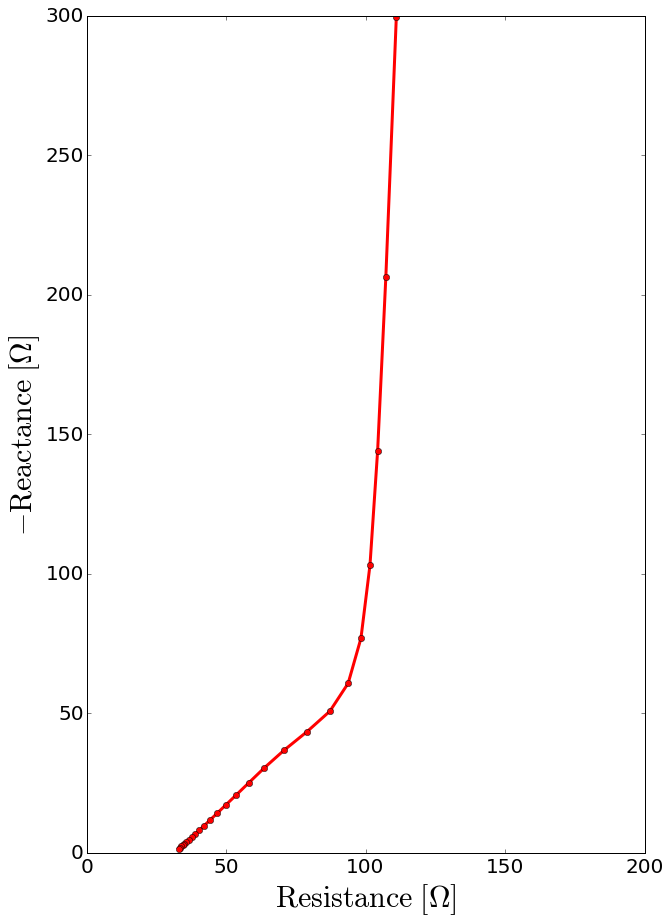

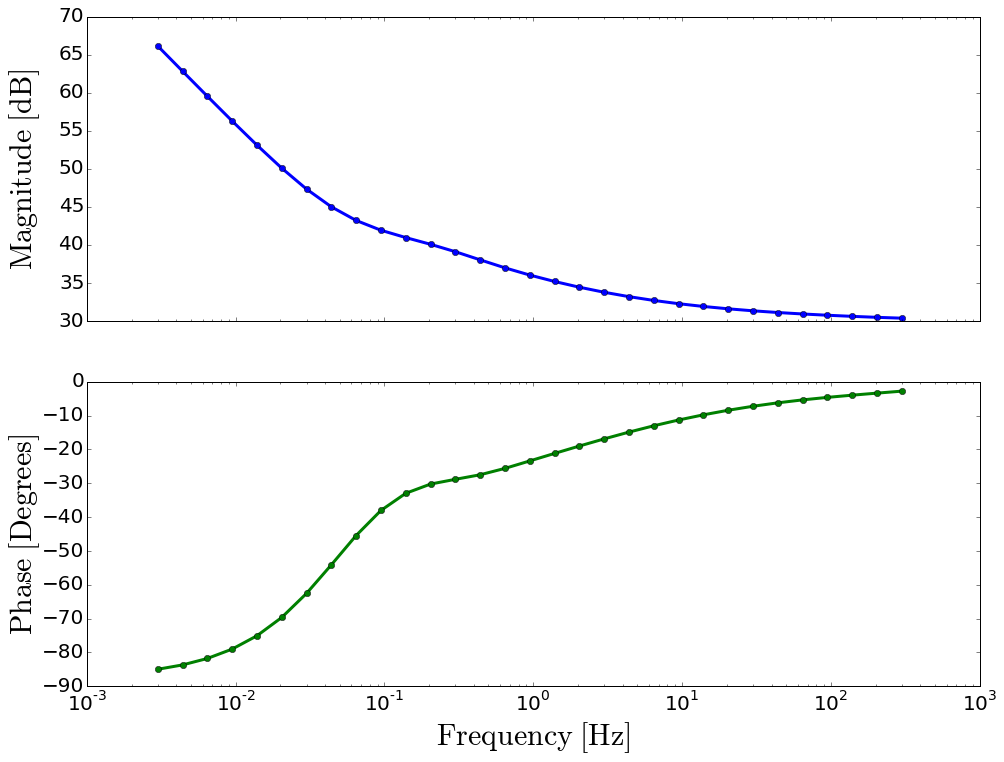

In [5]:
label_fontsize=30
tick_fontsize=20
labelx=-0.05
labely=0.5
plot_linewidth=3
matplotlib.pyplot.figure(figsize=(10,15))
matplotlib.pyplot.plot(resistance,-reactance,'r-o',lw=plot_linewidth)
matplotlib.pyplot.axis('equal')
matplotlib.pyplot.xlabel(r'$\mathrm{Resistance\ [\Omega]}$',fontsize=label_fontsize)
matplotlib.pyplot.ylabel(r'$\mathrm{-Reactance\ [\Omega]}$',fontsize=label_fontsize)
matplotlib.pyplot.gca().xaxis.set_tick_params(labelsize=tick_fontsize)
matplotlib.pyplot.gca().yaxis.set_tick_params(labelsize=tick_fontsize)
matplotlib.pyplot.xlim(0,200)
matplotlib.pyplot.ylim(0,300)
f,axarr=matplotlib.pyplot.subplots(2,sharex=True,figsize=(16,12))
axarr[0].plot(frequency,magnitude,'b-o',lw=plot_linewidth)
axarr[0].set_xscale('log')
axarr[0].set_ylabel(r'$\mathrm{Magnitude\ [dB]}$',fontsize=label_fontsize)
axarr[0].get_yaxis().set_tick_params(labelsize=tick_fontsize)
axarr[0].yaxis.set_label_coords(labelx,labely)
axarr[1].plot(frequency,phase,'g-o',lw=plot_linewidth)
axarr[1].set_xscale('log')
axarr[1].set_ylabel(r'$\mathrm{Phase\ [Degrees]}$',fontsize=label_fontsize)
axarr[1].set_xlabel(r'$\mathrm{Frequency\ [Hz]}$',fontsize=label_fontsize)
axarr[1].get_yaxis().set_tick_params(labelsize=tick_fontsize)
axarr[1].get_xaxis().set_tick_params(labelsize=tick_fontsize)
axarr[1].yaxis.set_label_coords(labelx,labely)
matplotlib.pyplot.show()